In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdpf

In [2]:
path= '../tableau_project.csv'
df = pd.read_csv(path, index_col= 'Unnamed: 0')

In [3]:
df.head()

,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,...,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,...,"5,204",0,"7,943","1,058",Android,590,48,662,0,9.0
1,444b084ec64244919afadfba879876a3,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,...,"3,552",0,"3,054",689,Android,923,4,0,0,10.0
3,1ffe9a24033847148c683574985df56c,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 09:17:08,19.433119,-99.154844,2017-12-16 09:17:30,19.290148,-99.144407,rider cancel,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,...,"2,974",12,"2,859",887,iPhone,329,36,0,0,8.0


In [4]:
df.describe()

,start_lat,start_lon,end_lat,end_lon,rating
count,3864.000000,3864.000000,3807.000000,3807.000000,3864.000000
mean,19.412159,-99.195443,19.410835,-99.197221,8.289596
std,0.028146,0.040832,0.030001,0.044896,1.265744
min,19.290513,-99.288274,19.196463,-99.655665,4.000000
25%,19.405320,-99.207814,19.379486,-99.253980,8.000000
50%,19.422749,-99.175834,19.422749,-99.178435,9.000000
75%,19.426613,-99.170483,19.429759,-99.171955,9.000000
max,19.513544,-99.051114,19.517451,-99.048817,10.000000


In [5]:
report = pdpf.ProfileReport(df)
report

Number of variables,21
Number of observations,3864
Total Missing (%),5.7%
Total size in memory,664.1 KiB
Average record size in memory,176.0 B
Numeric,5
Categorical,14
Boolean,0
Date,0
Text (Unique),2
Rejected,0


In [6]:
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

end_lat                  57
end_lon                  57
price                    20
price_distance         1052
price_duration         1052
distance                 20
duration                 20
rider_waiting_time     1131
driver_waiting_time    1179
discount                 20
dtype: int64

In [7]:
df = df.drop(['journey_id', 'start_type', 'discount'], axis=1)

In [8]:
#df['end_state'=='']
df['end_state'].value_counts()

drop off         2685
rider cancel     1146
not found          20
no show            12
driver cancel       1
Name: end_state, dtype: int64

In [9]:
df_lat_null= df[(df['end_lat'].isnull() == True) & (df['end_lon'].isnull() == True)]
df_lat_null.head()

,vehicle_type_id,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
1,077866c3fd1a75f51ca7f8eae166ae32,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,0,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
152,21620ea5749f2e0679a8c72c7fbafb9e,2017-11-14 05:18:19,19.431498,-99.187064,2017-11-14 05:18:48,NaN,NaN,rider cancel,0,NaN,NaN,0,0,iPhone,NaN,NaN,0,0,8.0
492,21620ea5749f2e0679a8c72c7fbafb9e,2017-11-11 03:27:38,19.433270,-99.173481,2017-11-11 03:52:14,NaN,NaN,drop off,"5,588","5,088",0,"4,744","1,331",web,126,133,0,0,10.0
750,21620ea5749f2e0679a8c72c7fbafb9e,2017-05-17 17:33:57,19.390412,-99.185959,2017-05-17 17:58:29,NaN,NaN,drop off,"6,120","6,120",0,"5,079","1,081",iPhone,369,20,0,0,6.0
946,21620ea5749f2e0679a8c72c7fbafb9e,2017-06-09 22:34:48,19.438234,-99.201190,2017-06-09 22:34:59,NaN,NaN,rider cancel,0,NaN,NaN,0,0,iPhone,NaN,NaN,0,0,6.0


In [11]:
#Eliminar los recorridos sin finalizar para pintar lat, long.
df_est_latit = df.drop(df_lat_null.index)

In [12]:
df.dtypes

vehicle_type_id         object
start_at                object
start_lat              float64
start_lon              float64
end_at                  object
end_lat                float64
end_lon                float64
end_state               object
price                   object
price_distance          object
price_duration          object
distance                object
duration                object
source                  object
rider_waiting_time      object
driver_waiting_time     object
price_supplements       object
discount                object
rating                 float64
dtype: object

In [29]:
df.query('price_distance == "0"')

,vehicle_type_id,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
1,077866c3fd1a75f51ca7f8eae166ae32,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,0.000,0.0,0.000,0.00,0.000,iPhone,0,NaN,0.0,0,9.0
3,077866c3fd1a75f51ca7f8eae166ae32,2017-12-16 09:17:08,19.433119,-99.154844,2017-12-16 09:17:30,19.290148,-99.144407,rider cancel,0.000,0.0,0.000,0.00,0.000,iPhone,0,NaN,0.0,0,9.0
10,077866c3fd1a75f51ca7f8eae166ae32,2017-11-30 23:03:44,19.421545,-99.174222,2017-11-30 23:03:50,19.442719,-99.201140,rider cancel,0.000,0.0,0.000,0.00,0.000,iPhone,0,NaN,0.0,0,10.0
13,077866c3fd1a75f51ca7f8eae166ae32,2017-11-30 03:02:10,19.415241,-99.178212,2017-11-30 03:02:23,19.407004,-99.175830,rider cancel,0.000,0.0,0.000,0.00,0.000,Android,0,NaN,0.0,0,9.0
14,077866c3fd1a75f51ca7f8eae166ae32,2017-11-30 03:01:26,19.422034,-99.174665,2017-11-30 03:01:57,19.438666,-99.180821,rider cancel,0.000,0.0,0.000,0.00,0.000,Android,0,NaN,0.0,0,9.0
16,077866c3fd1a75f51ca7f8eae166ae32,2017-12-16 02:42:52,19.406538,-99.169710,2017-12-16 02:43:04,19.425151,-99.178225,rider cancel,0.000,0.0,0.000,0.00,0.000,iPhone,0,NaN,0.0,0,9.0
28,077866c3fd1a75f51ca7f8eae166ae32,2017-11-30 15:06:39,19.419962,-99.171955,2017-11-30 15:06:56,19.441434,-99.183503,rider cancel,0.000,0.0,0.000,0.00,0.000,iPhone,0,NaN,0.0,0,10.0
55,077866c3fd1a75f51ca7f8eae166ae32,2017-12-14 23:44:46,19.422016,-99.174574,2017-12-15 00:07:21,19.441414,-99.183993,rider cancel,4.000,0.0,0.000,14.00,245.000,Android,0,NaN,0.0,0,8.0
56,077866c3fd1a75f51ca7f8eae166ae32,2017-12-14 23:41:41,19.422016,-99.174574,2017-12-14 23:44:39,19.441414,-99.183993,rider cancel,0.000,0.0,0.000,0.00,0.000,Android,0,NaN,0.0,0,8.0
66,21620ea5749f2e0679a8c72c7fbafb9e,2017-11-10 11:45:00,19.407004,-99.175830,2017-11-10 11:45:47,19.429759,-99.163845,rider cancel,10.000,0.0,0.000,0.00,0.000,Android,0,NaN,0.0,0,10.0


In [30]:
df['rider_waiting_time']=df['rider_waiting_time'].fillna('0')
df['driver_waiting_time']=df['driver_waiting_time'].fillna('0')

In [25]:
to_float_columns= ['price', 'price_distance', 'price_duration', 'price_supplements', 'distance', 'duration']

def convert_to_float(list_cols):
    for col in list_cols:
        df[col] = df[col].str.replace(',', '.')
        df[col] = df[col].astype('float64')
    

In [26]:
#todo. Los putos nan
convert_to_float(to_float_columns)

In [27]:
df.dtypes

vehicle_type_id         object
start_at                object
start_lat              float64
start_lon              float64
end_at                  object
end_lat                float64
end_lon                float64
end_state               object
price                  float64
price_distance         float64
price_duration         float64
distance               float64
duration               float64
source                  object
rider_waiting_time      object
driver_waiting_time     object
price_supplements      float64
discount                object
rating                 float64
dtype: object

/home/miguel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/miguel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


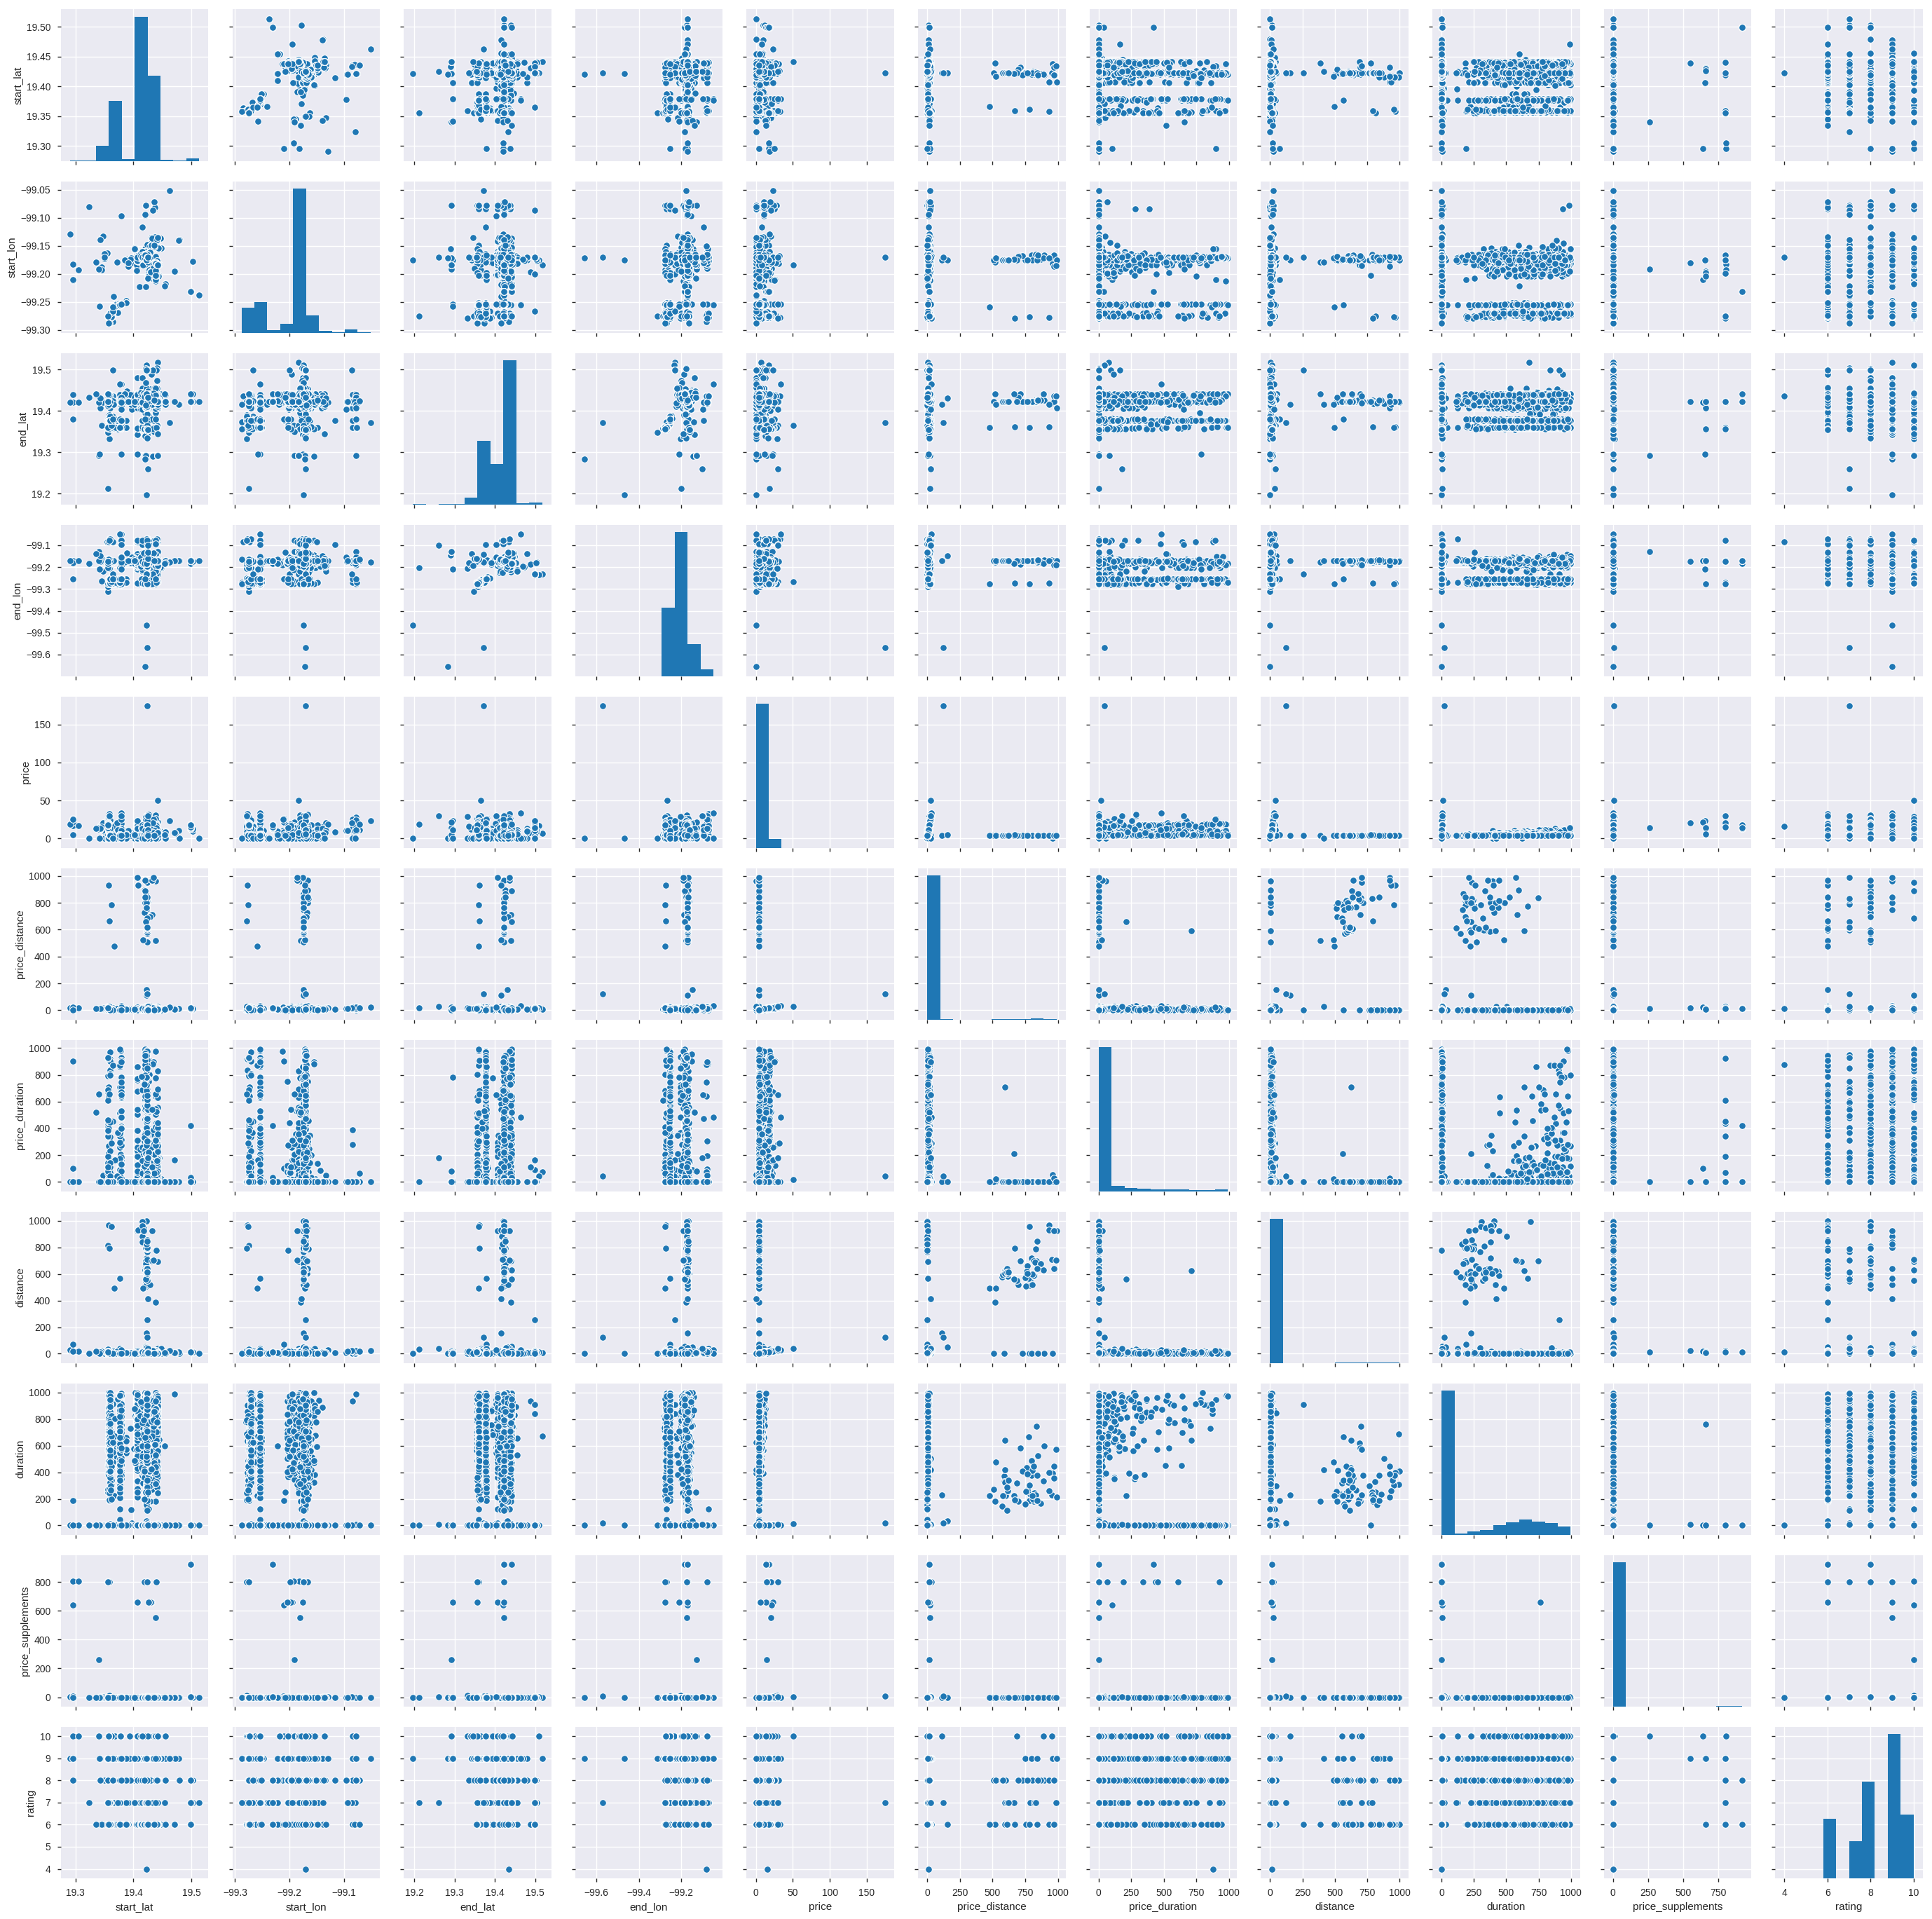

In [31]:
sns.pairplot(df)

In [40]:
df_source = pd.pivot_table(df, index='source', 
                           values=['price', 'price_distance', 'price_duration','price_supplements'], aggfunc='sum')
df_source

,price,price_distance,price_duration,price_supplements
source,,,,
Android,5916.227,23970.074,50048.294,3359.951
iPhone,14112.928,36772.060,113095.787,23550.128
web,70.013,62.701,1639.174,0.000


In [41]:
df_car_type = pd.pivot_table(df, index='vehicle_type_id', 
                           values=['price', 'price_distance', 'price_duration','price_supplements'], aggfunc='sum')
df_car_type

,price,price_distance,price_duration,price_supplements
vehicle_type_id,,,,
077866c3fd1a75f51ca7f8eae166ae32,843.952,669.604,10861.215,2768.792
21620ea5749f2e0679a8c72c7fbafb9e,19255.216,60135.231,153922.040,24141.287
